In [ ]:
# Step 1: Install necessary libraries (if needed)
!pip install tensorflow pandas matplotlib scikit-learn --quiet

# Step 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Step 3: Load real COVID-19 data from Johns Hopkins
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)
df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


<ipython-input-4-5d0456c9f8e8>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  global_cases.index = pd.to_datetime(global_cases.index)  # Convert dates


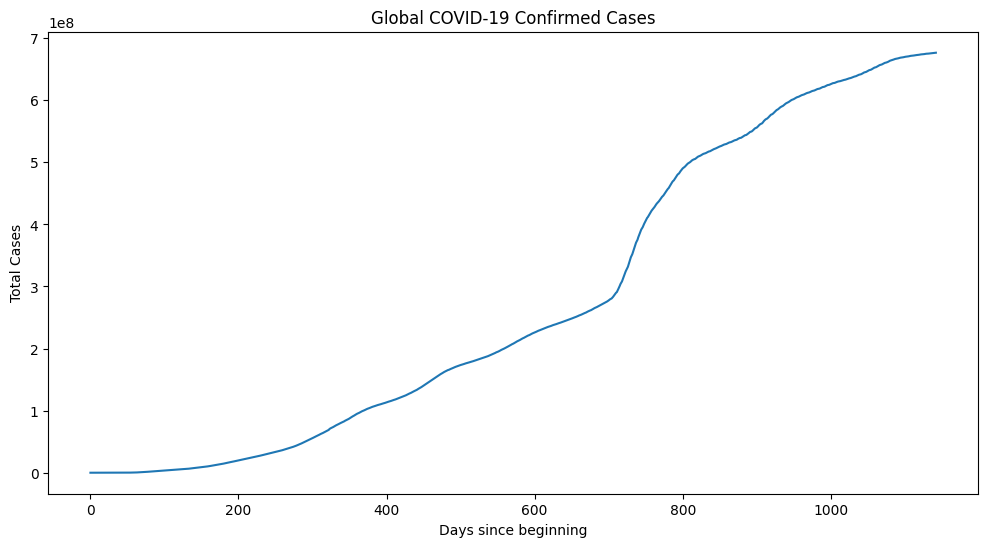

Input shape: (1133, 10, 1), Output shape: (1133, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1233
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3854e-04
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.8875e-05
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.0433e-05
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3712e-05
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6828e-05
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2328e-05
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0675e-05
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0331e-05
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.9364e-06
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.6064e-06
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.9584e-06
Epoch 13/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5370e-06
Epoch 14/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3806e-06
Epoch 15/50
71/71 ━━━━━━━━━━

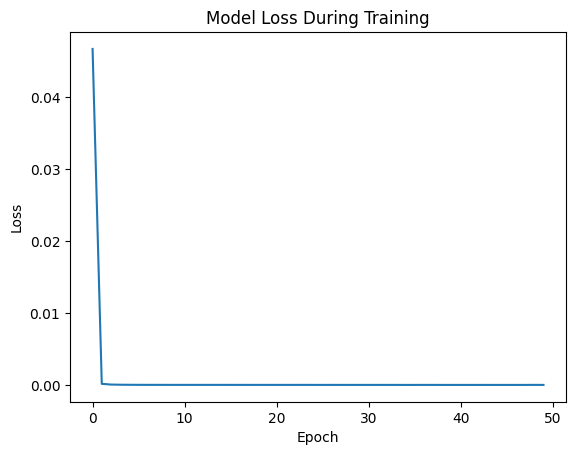

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


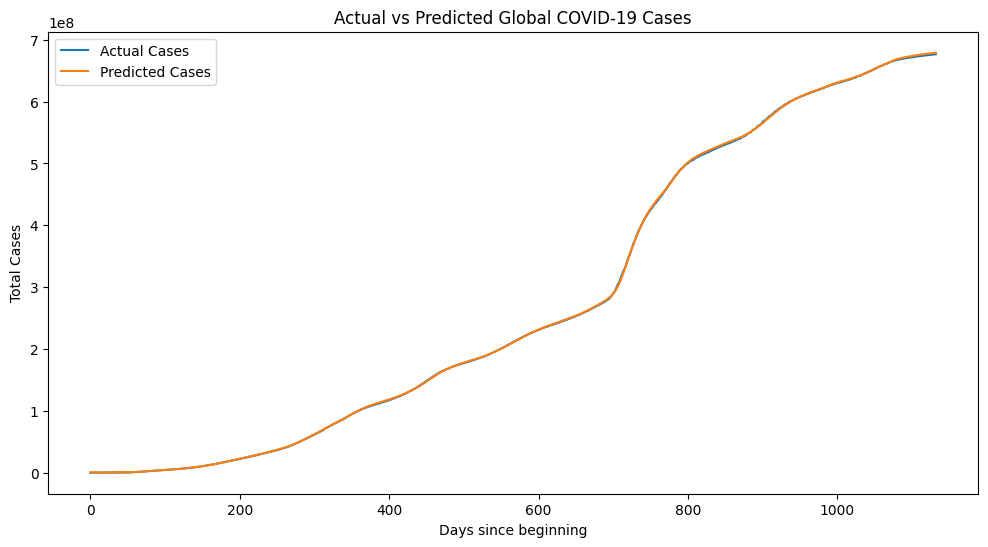

In [ ]:

# Step 4: Preprocess data
# We'll use the total global cases (sum of all countries)
global_cases = df.iloc[:, 4:].sum(axis=0)
global_cases.index = pd.to_datetime(global_cases.index)  # Convert dates
global_cases = global_cases.values

# Plot real cases
plt.figure(figsize=(12,6))
plt.plot(global_cases)
plt.title('Global COVID-19 Confirmed Cases')
plt.xlabel('Days since beginning')
plt.ylabel('Total Cases')
plt.show()

# Step 5: Prepare data for the model
scaler = MinMaxScaler()
cases_scaled = scaler.fit_transform(global_cases.reshape(-1, 1))

X = []
y = []
n_steps = 10  # Predict next day from last 10 days

for i in range(n_steps, len(cases_scaled)):
    X.append(cases_scaled[i-n_steps:i])
    y.append(cases_scaled[i])

X, y = np.array(X), np.array(y)

print(f"Input shape: {X.shape}, Output shape: {y.shape}")

# Step 6: Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
history = model.fit(X, y, epochs=50, batch_size=16, verbose=1)

# Step 8: Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Step 9: Make predictions
predictions = model.predict(X)
predictions_rescaled = scaler.inverse_transform(predictions)

# Compare real vs predicted
plt.figure(figsize=(12,6))
plt.plot(global_cases[n_steps:], label='Actual Cases')
plt.plot(predictions_rescaled.flatten(), label='Predicted Cases')
plt.legend()
plt.title('Actual vs Predicted Global COVID-19 Cases')
plt.xlabel('Days since beginning')
plt.ylabel('Total Cases')
plt.show()
